In [1]:
import scanpy as sc
import anndata
import os
import fnmatch
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import importlib
import sys
from harmony import harmonize
import seaborn as sns
from matplotlib import rcParams
import math
from scipy import stats
import seaborn as sns
import scipy as sp
import h5py
import warnings
import random
import math
import scvelo as scv
from matplotlib import rcParams
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap

In [2]:
#Setting Scanpy figure parameters 
sc.settings.set_figure_params(dpi = 500, color_map = 'RdPu', dpi_save = 500)

# 1. Import .h5 files

In [5]:
# Directory path
#"16_week" data are removed from the adata (these data were not used in any analyses and are unrelated to this NHP study)
directory = './CellBender_Filtered_h5_files'
granuloma = '*Gran*'
matching_files = []
for filename in os.listdir(directory):
    if fnmatch.fnmatch(filename, granuloma):
        matching_files.append(filename)
print(matching_files)
len(matching_files)

['13518_Array4Granulo.h5', '12818_Array4Granulo.h5', '12518_Array4Granulo.h5', '13918_Array11Granul.h5', '13918_Array10Granul.h5', '14018_Array3Granulo.h5', '13818_Array9Granulo.h5', '12518_Array2Granulo.h5', '12818_Array2Granulo.h5', '13518_Array2Granulo.h5', '14018_Array5Granulo.h5', '13518_Array5Granulo.h5', '12818_Array5Granulo.h5', '12518_Array5Granulo.h5', '13818_Array12Granul.h5', '14018_Array2Granulo.h5', '13818_Array8Granulo.h5', '14218_Array11Granul.h5', '14218_Array10Granul.h5', '12518_Array3Granulo.h5', '12818_Array3Granulo.h5', '13518_Array3Granulo.h5', '14018_Array4Granulo.h5', '28618_Array4Granulo.h5', '12818_Array6Granulo.h5', '13518_Array6Granulo.h5', '28318_Array3Granulo.h5', '13918_Array12Granul.h5', '14218_Array9Granulo.h5', '13918_Array8Granulo.h5', '28618_Array5Granulo.h5', '14218_Array12Granul.h5', '13818_Array11Granul.h5', '13818_Array10Granul.h5', '14218_Array8Granulo.h5', '13918_Array9Granulo.h5']


36

In [13]:
adata_list=[]
for f in matching_files:
    monkey=f[0:5]
    array = f.split("_")[-1]
    file=f[-5:]
    a=sc.read_10x_h5(f)
    a.var_names_make_unique()
    a.obs_names = [monkey+"_"+array+"_"+i for i in a.obs_names]
    a.obs_names = [i.replace('.h5','') for i in a.obs_names]
    adata_list += [a]
    print(f)

13518_Array4Granulo.h5
12818_Array4Granulo.h5
12518_Array4Granulo.h5
13918_Array11Granul.h5
13918_Array10Granul.h5
14018_Array3Granulo.h5
13818_Array9Granulo.h5
12518_Array2Granulo.h5
12818_Array2Granulo.h5
13518_Array2Granulo.h5
14018_Array5Granulo.h5
13518_Array5Granulo.h5
12818_Array5Granulo.h5
12518_Array5Granulo.h5
13818_Array12Granul.h5
14018_Array2Granulo.h5
13818_Array8Granulo.h5
14218_Array11Granul.h5
14218_Array10Granul.h5
12518_Array3Granulo.h5
12818_Array3Granulo.h5
13518_Array3Granulo.h5
14018_Array4Granulo.h5
28618_Array4Granulo.h5
12818_Array6Granulo.h5
13518_Array6Granulo.h5
28318_Array3Granulo.h5
13918_Array12Granul.h5
14218_Array9Granulo.h5
13918_Array8Granulo.h5
28618_Array5Granulo.h5
14218_Array12Granul.h5
13818_Array11Granul.h5
13818_Array10Granul.h5
14218_Array8Granulo.h5
13918_Array9Granulo.h5


In [14]:
all_adata = sc.concat(adata_list,join='outer')
all_adata

AnnData object with n_obs × n_vars = 171974 × 32152

In [15]:
all_adata.obs["sample"] = ["_".join(i.split("/")[-1].split("_")[:-1])for i in all_adata.obs_names]

In [17]:
meta = pd.read_csv("./Reinfection_Metadata_CellBender.csv", index_col=0)
meta.index = meta["DGE_name"]
for col in meta.columns:
    all_adata.obs[col] = all_adata.obs["sample"].map(meta[col])
print(all_adata.obs_names)

Index(['13518_Array4Granulo_CTCCCCGATTCC', '13518_Array4Granulo_GAGTAATACGCA',
       '13518_Array4Granulo_ATAACCCGGACG', '13518_Array4Granulo_ATGGATTGAGTA',
       '13518_Array4Granulo_ACCTACTAGCTG', '13518_Array4Granulo_AGCTGTCGTCAT',
       '13518_Array4Granulo_TGGAGGGTGATA', '13518_Array4Granulo_CGATAGTCACTC',
       '13518_Array4Granulo_GGATGAAAAGTG', '13518_Array4Granulo_GGGACACTATCC',
       ...
       '13918_Array9Granulo_CGCGGGGCAATC', '13918_Array9Granulo_TGTCAACATAGT',
       '13918_Array9Granulo_GGACGCTGCATA', '13918_Array9Granulo_CAGGGCGAGCAC',
       '13918_Array9Granulo_CGCCTCCATCTC', '13918_Array9Granulo_CTACTCAAATCG',
       '13918_Array9Granulo_AGAGTGTGACCG', '13918_Array9Granulo_GGACGCCGTTCC',
       '13918_Array9Granulo_GACCGCGCGTGG', '13918_Array9Granulo_AACGCATGCAAC'],
      dtype='object', length=171974)


In [18]:
all_adata

AnnData object with n_obs × n_vars = 171974 × 32152
    obs: 'sample', 'DGE_name', 'monkey', 'array number', 'Sample Name', 'Sample type', 'Time point of sampling', 'Infusion before 2nd Mtb infection anti CD4 or IgG', 'Naïve or Primary Infection or Reinfection at sample time', 'Group', 'Group_Detailed', 'Drug Treatment', 'CFU Total ', 'Type of Mtb strain '

# 2. Filter min genes, MT, Ribo, HBB, UMIs

In [22]:
sc.pp.filter_cells(all_adata, min_genes=300)
sc.pp.filter_cells(all_adata, min_counts=500)
sc.pp.filter_genes(all_adata, min_cells=10)

In [25]:
# the cyno macaque genomome does not have the -MT annotation in genome so we need to select genes cannonically associated with mitochonronditial reads and previously established (eg Gideon et al Immunity 2022)
cyno_mitogenes = ["COX1","COX2","COX3","CYTB","ND1","ND2","ND3","ND4","ND4L","ND5","ATP6","ATP8"]
all_adata.obs['percent_mito'] = np.sum( 
    all_adata[:, cyno_mitogenes].X, axis=1).A1/ all_adata.obs['n_counts'].values

In [27]:
#filter based on %mito reads
all_adata = all_adata[all_adata.obs['percent_mito'] < mitothresh, :]

In [29]:
# get genes ribo genes 
ribo_genes = all_adata.var_names.str.startswith(("RPS","RPL"))
print(sum(ribo_genes))

91


In [41]:
ribo_genes_adata = all_adata[:, ribo_genes]  
ribo_genes_list = ribo_genes_adata.var_names.tolist()
ribo_genes_list

['RPL10',
 'RPL10A',
 'RPL10L',
 'RPL11',
 'RPL12',
 'RPL13',
 'RPL13A',
 'RPL14',
 'RPL15',
 'RPL18',
 'RPL18A',
 'RPL19',
 'RPL21',
 'RPL22',
 'RPL22L1',
 'RPL23',
 'RPL23A',
 'RPL24',
 'RPL26',
 'RPL26L1',
 'RPL27',
 'RPL27A',
 'RPL28',
 'RPL29',
 'RPL3',
 'RPL30',
 'RPL31',
 'RPL32',
 'RPL34',
 'RPL35',
 'RPL35A',
 'RPL36',
 'RPL36AL',
 'RPL37',
 'RPL37A',
 'RPL38',
 'RPL39',
 'RPL39L',
 'RPL3L',
 'RPL4',
 'RPL41',
 'RPL5',
 'RPL6',
 'RPL7',
 'RPL7A',
 'RPL7L1',
 'RPL9',
 'RPLP0',
 'RPLP1',
 'RPLP2',
 'RPS10',
 'RPS11',
 'RPS12',
 'RPS13',
 'RPS14',
 'RPS15A',
 'RPS16',
 'RPS17',
 'RPS18',
 'RPS19',
 'RPS19BP1',
 'RPS2',
 'RPS20',
 'RPS21',
 'RPS23',
 'RPS24',
 'RPS25',
 'RPS26',
 'RPS27',
 'RPS27A',
 'RPS27L',
 'RPS28',
 'RPS29',
 'RPS3',
 'RPS3A',
 'RPS4X',
 'RPS5',
 'RPS6',
 'RPS6KA1',
 'RPS6KA3',
 'RPS6KA4',
 'RPS6KA5',
 'RPS6KA6',
 'RPS6KB1',
 'RPS6KB2',
 'RPS6KC1',
 'RPS6KL1',
 'RPS7',
 'RPS8',
 'RPS9',
 'RPSA']

In [31]:
ribothresh=0.1
all_adata.obs['percent_ribo'] = np.sum(
    all_adata[:, ribo_genes].X, axis=1).A1 / all_adata.obs['n_counts'].values

In [33]:
#filter based on %heme reads
hbbthresh=0.1
hbb_genes = ['HBB']
all_adata.obs['percent_hbb'] = np.array(all_adata[:, 'HBB'].X.todense()).reshape(-1) / all_adata.obs['n_counts'].values

In [35]:
#additonal mito-high genes we will use for blacklisting genes 
mito_corr_genes=['ANKRD12',
 'ATP6',
 'ATP8',
 'COX1',
 'COX2',
 'COX3',
 'CYTB',
 'LOC102116649',
 'LOC102122855',
 'LOC102125550',
 'LOC102125623',
 'LOC102128706',
 'LOC102133296',
 'LOC102136468',
 'LOC102136862',
 'LOC102137002',
 'LOC102137297',
 'LOC102138874',
 'LOC102142558',
 'LOC102144039',
 'LOC102145630',
 'LOC102147203',
 'LOC107126411',
 'LOC107128653',
 'LOC107129917',
 'ND1',
 'ND2',
 'ND3',
 'ND4',
 'ND4L',
 'ND5',
 'ND6',
 'RPS6',
 'SRGN',
 'rna76576',
 'rna76577',
 'rna76578',
 'rna76594']

In [43]:
blacklist_genes = ribo_genes_list + ['HBB'] + mito_corr_genes
len(blacklist_genes)

130

In [44]:
all_adata.var['Blacklist_Genes'] = all_adata.var.index.isin(blacklist_genes)

# 3.Perform normalization, dimensionality reduction, clustering, scrublet

In [46]:
adata=all_adata
adata.raw = adata.copy()
# keep blacklist genes from vars (they are stored in .raw so still accessible)
adata = adata[:,~adata.var['Blacklist_Genes']]
#"16_week" data are removed from the adata (these data were not used in any analyses and are unrelated to this NHP study)
adata = adata[~adata.obs['Group'].isin(['16_week']), :]
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=None)
adata.var['highly_variable'].value_counts()
adata

AnnData object with n_obs × n_vars = 125184 × 25901
    obs: 'sample', 'DGE_name', 'monkey', 'array number', 'Sample Name', 'Sample type', 'Time point of sampling', 'Infusion before 2nd Mtb infection anti CD4 or IgG', 'Naïve or Primary Infection or Reinfection at sample time', 'Group', 'Group_Detailed', 'Drug Treatment', 'CFU Total ', 'Type of Mtb strain ', 'n_genes', 'n_counts', 'percent_mito', 'percent_ribo', 'percent_hbb'
    var: 'n_cells', 'Blacklist_Genes', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [ ]:
sc.tl.pca(adata, svd_solver = 'arpack', random_state = 18,use_highly_variable=True)
sc.pl.pca(adata, components=['1,2', '3,4'], color=['Group',"CD3D",'CD8A',"SFTPB","AGER","DCN","CSF1R"],
          ncols=4, use_raw=True)
sc.pl.pca_loadings(adata, components=[1,2,3,4])
sc.pl.pca_variance_ratio(adata, log=True)

In [ ]:
sc.pp.neighbors(adata, n_neighbors=40, n_pcs=18, random_state = 18)
sc.tl.umap(adata, min_dist = 0.1, spread = 2, random_state = 18)
sc.pl.umap(adata, color = ["Group"])

# 🧼 scrub a dub dub 🧼

In [52]:
import scrublet as scr
# run scrublet on individual granuloma (https://github.com/swolock/scrublet)
all_predicted_doublets = []
for sample in adata.obs['sample'].unique():
    print(f"Processing sample {sample}...")
    sample_adata = adata[adata.obs['sample'] == sample, :]
    scrub = scr.Scrublet(sample_adata.X)
    doublet_scores, predicted_doublets = None, None
    if sample_adata.shape[0] > 30 and sample_adata.shape[1] > 30:
        doublet_scores, predicted_doublets = scrub.scrub_doublets()
    else:
        n_comps = min(sample_adata.shape[0], sample_adata.shape[1]) - 1
        doublet_scores, predicted_doublets = scrub.scrub_doublets(n_prin_comps=n_comps)

    print(f"Finished processing {sample}. Number of predicted doublets: {np.sum(predicted_doublets)}")

    all_predicted_doublets.extend(predicted_doublets)

if len(all_predicted_doublets) == adata.n_obs:
    adata.obs['predicted_doublets'] = all_predicted_doublets
    print("All doublet predictions were successfully added to 'adata'.")
else:
    print(f"Error: Number of doublet predictions ({len(all_predicted_doublets)}) doesn't match the number of cells ({adata.n_obs}).")

adata

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.34
Detected doublet rate = 2.9%
Estimated detectable doublet fraction = 53.7%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 5.5%
Elapsed time: 4.9 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.36
Detected doublet rate = 3.1%
Estimated detectable doublet fraction = 45.6%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 6.8%
Elapsed time: 3.2 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.40
Detected doublet rate = 1.2%
Estimated detectable doublet fraction = 39.5%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 2.9%
Elapsed time: 0.2 seconds
Preprocessing...
Simulating double

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.33
Detected doublet rate = 3.5%
Estimated detectable doublet fraction = 53.7%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 6.6%
Elapsed time: 4.0 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.69
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 12.7%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 1.2%
Elapsed time: 3.3 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.24
Detected doublet rate = 8.6%
Estimated detectable doublet fraction = 56.6%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 15.1%
Elapsed time: 1.6 seconds
Preprocessing...
Simulating doubl

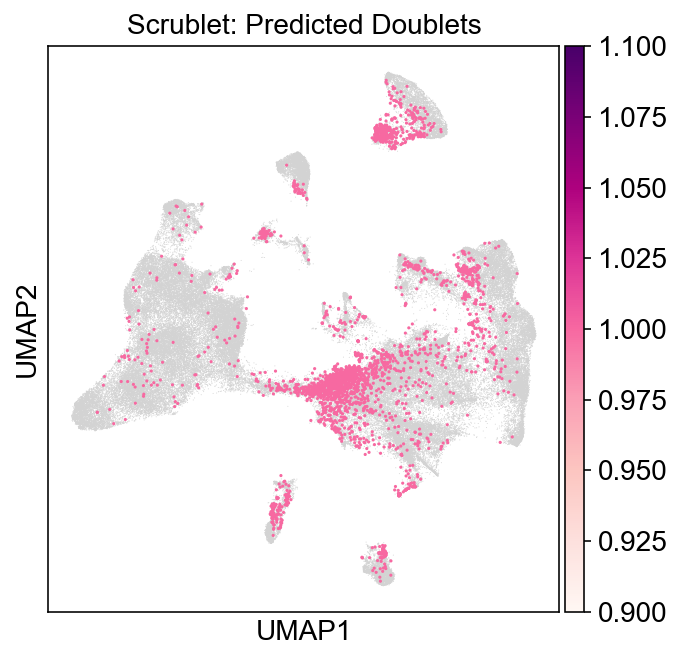

In [99]:
#qualitatively doublets prediction looks good
plt.rcParams['lines.linewidth'] = 2.0
fig, ax = plt.subplots(figsize=(5,5))
colors = ["#D3D3D3", "#800080"]
cmap_grey_pu = LinearSegmentedColormap.from_list("custom_cmap", colors)

# plot umap with predicited doublets
sc.pl.umap(adata, ax=ax, show=False)  
doublets_mask = adata.obs['predicted_doublets'].astype(bool)
doublets_indices = adata.obs.index[doublets_mask]
_adata_doublets = adata[doublets_indices, :]
sc.pl.umap(_adata_doublets, color='predicted_doublets',title='Scrublet: Predicted Doublets', palette=['black'], size=10, ax=ax, show=False)
plt.savefig('./UMAP_predicted_doublets_all_cells_for_pub_oct2023.png',bbox_inches="tight",transparent=True)
plt.show()

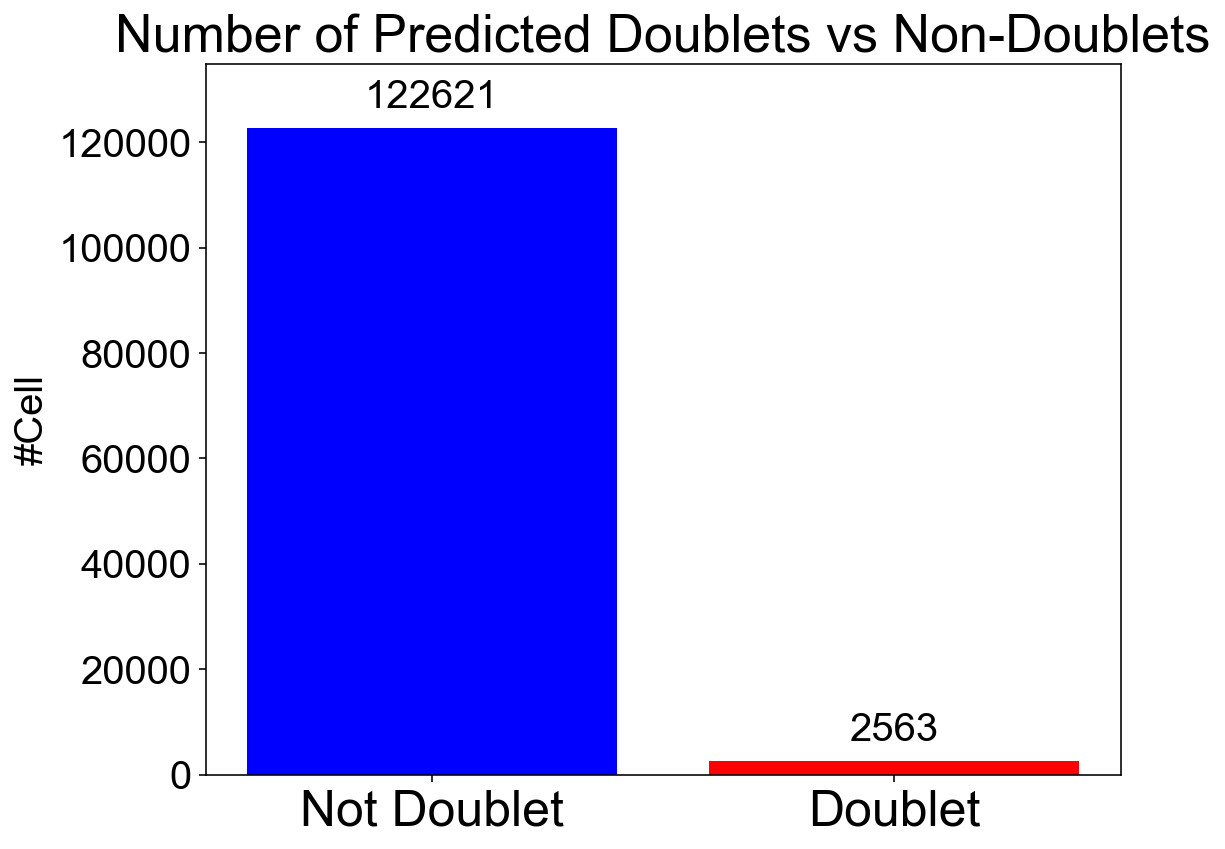

In [92]:
plt.figure(figsize=(8, 6))  
doublet_counts = adata.obs['predicted_doublets'].value_counts()
non_doublets = doublet_counts[False]  
doublets = doublet_counts[True] 
categories = ['Not Doublet', 'Doublet']
counts = [non_doublets, doublets]
plt.bar(categories, counts, color=['blue', 'red'])
plt.title('Number of Predicted Doublets vs Non-Doublets',fontsize=26)
plt.xticks(fontsize=25)
plt.xlabel('',fontsize=20)
plt.ylabel('#Cell',fontsize=20)
plt.yticks(fontsize=20)
plt.grid(False)
plt.ylim(0, max(counts) * 1.1)
for i, count in enumerate(counts):
    plt.text(i, count + 0.02 * max(counts), str(count), ha = 'center', va = 'bottom',fontsize=20)
plt.tight_layout()
plt.savefig('./barplot_predicted_doublets_all_cells.png',bbox_inches="tight",transparent=True)
plt.show()


Create postions for Doublets and Cell Types, Subsets, and States

In [97]:
#these .obs fields will be used when subclustering
adata.obs['Subclustering'] = np.nan
adata.obs['Doublet'] = False
# some columns need to be converted to string so that we can save object
adata.obs['Infusion before 2nd Mtb infection anti CD4 or IgG'] = adata.obs['Infusion before 2nd Mtb infection anti CD4 or IgG'].astype(str)
adata.obs['predicted_doublets'] = adata.obs['predicted_doublets'].astype(int)
adata.write_h5ad("./Scanpy_H5AD/adata_CellBender_Scrublet_not_scrubed_for_publication.h5ad")